In [ ]:
!pip install prophet --quiet


## **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


## **Load data**

In [ ]:
train = pd.read_csv('/content/train1.csv')
stores = pd.read_csv('/content/stores.csv')
oil = pd.read_csv('/content/oil.csv')
holidays = pd.read_csv('/content/holidays_events.csv')


## **Clean and Convert 'date' column to datetime**

In [ ]:
train = train[train['date'].astype(str).str.match(r'^\d{4}-\d{2}-\d{2}$', na=False)]
oil = oil[oil['date'].astype(str).str.match(r'^\d{4}-\d{2}-\d{2}$', na=False)]
holidays = holidays[holidays['date'].astype(str).str.match(r'^\d{4}-\d{2}-\d{2}$', na=False)]

train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'])


 merge store metadata

In [ ]:
data = pd.merge(train, stores, on='store_nbr', how='left')


Filter data for one store and one product family

In [ ]:
store_id = 1
family = 'GROCERY I'

subset = data[(data['store_nbr'] == store_id) & (data['family'] == family)]


 Group sales per day

In [ ]:
daily_sales = subset.groupby('date').agg({'sales': 'sum'}).reset_index()


In [ ]:
daily_sales = daily_sales.rename(columns={'date': 'ds', 'sales': 'y'})


## **Plot historical sales**

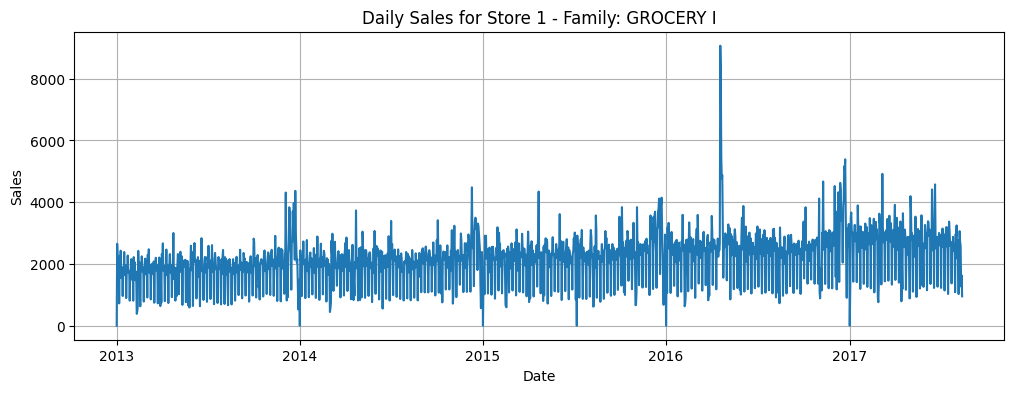

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(daily_sales['ds'], daily_sales['y'])
plt.title(f'Daily Sales for Store {store_id} - Family: {family}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


## **Train Prophet model**

In [ ]:
 model = Prophet()
model.fit(daily_sales)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp40iklte1/hyly4x07.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp40iklte1/rrmp4utw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1829', 'data', 'file=/tmp/tmp40iklte1/hyly4x07.json', 'init=/tmp/tmp40iklte1/rrmp4utw.json', 'output', 'file=/tmp/tmp40iklte1/prophet_modeliwjg489e/prophet_model-20250513044533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:45:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:45:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## **make 90 days future prediction**

In [ ]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)


In [ ]:
fig1 = model.plot(forecast)
plt.title('Forecasted Sales')
plt.show()

## **show forcasted value**

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
1762,2017-11-02,2713.242973,2101.352979,3326.026812
1763,2017-11-03,2905.764261,2282.190465,3556.084444
1764,2017-11-04,2818.123348,2196.572288,3456.892919
1765,2017-11-05,1533.491821,912.017058,2135.631212
1766,2017-11-06,2886.060008,2292.334259,3527.243369
1767,2017-11-07,2914.167157,2288.785579,3519.712528
1768,2017-11-08,3276.088352,2642.079193,3869.545689
1769,2017-11-09,2733.763645,2129.339527,3409.288708
1770,2017-11-10,2916.294925,2286.247112,3499.014797
1771,2017-11-11,2818.895411,2216.099680,3439.029987
